# KNN Classification with Credit Card Fraud

<p> We will install all the dependencies first </p>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
import warnings


In [59]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")

<p> Some theory about KNN </p>

In [19]:
# Assign class based on most similar items. Really good when the relationship between features are complex. 
# Supervised Algorithm
# Can also be used multi-classification problem
# The algorithm uses "distance" between points to find the "label"
# Distance parameter can be "Euclidean" or "Manhattan"
# One example to calculate Euclidean Distance

# Lazy learn algorithm
# No model is built and also non-paramteric (no paramteres learned about the data)
# There is no training but making predictions is slow



<img src="1200px-Euclidean_distance_2d.png">

In [21]:
# K needs to be defined ...
# It should not be too small (underfitting) or too large (overfitting)

In [18]:
import numpy as np

point1 = np.array((1,2,3))
point2 = np.array((1,1,1))

distance = np.linalg.norm(point1 - point2)

print(distance)

2.23606797749979


In [22]:
from sklearn.neighbors import KNeighborsClassifier

<p> Importing the dataset </p>

In [2]:
credit_card = pd.read_csv('creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [60]:
# To identify class weight 
class_weights = class_weight.compute_class_weight('balanced',np.unique(credit_card['Class']),y.values)

In [41]:
class_weights = dict(zip(np.unique(credit_card['Class']), class_weights))
class_weights

{0: 0.5008652375006595, 1: 289.4380081300813}

In [42]:
X = credit_card.drop(['Time','Class'], axis=1)
y = credit_card['Class']

In [43]:
X_train, X_t, y_train, y_t = train_test_split(X,y,test_size=0.4,stratify=y)

In [44]:
X_test, X_valid, y_test, y_valid = train_test_split(X_t,y_t,test_size=0.2,stratify=y_t)

In [45]:
print(X_train.shape, X_test.shape, X_valid.shape)

(170884, 29) (91138, 29) (22785, 29)


In [61]:
print(y_train.shape, y_test.shape, y_valid.shape)

(170884,) (91138,) (22785,)


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [67]:
# Fit and transformed on X_train, This is important to fit with "Training"
X_train_scaled = scaler.fit_transform(X_train)

In [68]:
# The same scaled is then used to transform X_test
X_test_scaled = scaler.transform(X_test)

In [46]:
classifier = KNeighborsClassifier(n_neighbors=3,weights='distance')

In [69]:
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [70]:
predict = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns

In [72]:
print(confusion_matrix(y_test,predict))

[[76932 14048]
 [   66    92]]


In [73]:
print(accuracy_score(y_test,predict))

0.8451359476837323


In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
len(credit_card)

284807

In [77]:
np.sqrt(len(credit_card))

533.6731209270334

In [78]:
from sklearn.model_selection import GridSearchCV

In [89]:
k_range = list(range(500,700,50))

In [90]:
weight_options = ['uniform','distance']

In [91]:
parameter_grid = dict(n_neighbors=k_range,weights=weight_options)

In [92]:
parameter_grid

{'n_neighbors': [500, 550, 600, 650], 'weights': ['uniform', 'distance']}

In [93]:
knn = KNeighborsClassifier(n_neighbors=5)

In [94]:
grid = GridSearchCV(estimator=knn,param_grid=parameter_grid,cv=5,scoring='recall')

In [95]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [500, 550, 600, 650],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [96]:
grid.best_params_

{'n_neighbors': 500, 'weights': 'distance'}

In [98]:
grid.best_score_

0.06779661016949153

In [99]:
knn = KNeighborsClassifier(n_neighbors=500, weights='distance')

In [100]:
fitted_model = knn.fit(X_train,y_train)

In [101]:
predictions = fitted_model.predict(X_test)

In [103]:
# ROC Curve 

from sklearn.metrics import roc_curve

In [108]:
prob_estimates = fitted_model.predict_proba(X_test)[:,1]

<h2><center> ROC Curve </center></h2>

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

In [117]:
pd.DataFrame(confusion_matrix(y_test,predictions), columns=['Predcited_0','Predicted_1'],index=['True_0','True_1'])

,Predcited_0,Predicted_1
True_0,90980,0
True_1,152,6


In [118]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [120]:
print(tn ," : Were actually negative and were predicted negative")
print(tp , ": Were actually positive and were predicted positive")
print(fp, ": Were actually negative but were predicted positive")
print(fn, ": Were actually positive but were predicted negative")

90980  : Were actually negative and were predicted negative
6 : Were actually positive and were predicted positive
0 : Were actually negative but were predicted positive
152 : Were actually positive but were predicted negative


In [124]:
noskill_prob = [0 for _ in range(len(y_test))]

In [125]:
noskill_auc = roc_auc_score(y_test,noskill_prob)

In [127]:
knn_auc = roc_auc_score(y_test,prob_estimates)

In [128]:
knn_auc

0.9421498952336165

In [129]:
ns_fpr, ns_tpr, _ = roc_curve(y_test,noskill_prob)

In [132]:
knn_fpr, knn_tpr, _ = roc_curve(y_test,prob_estimates)

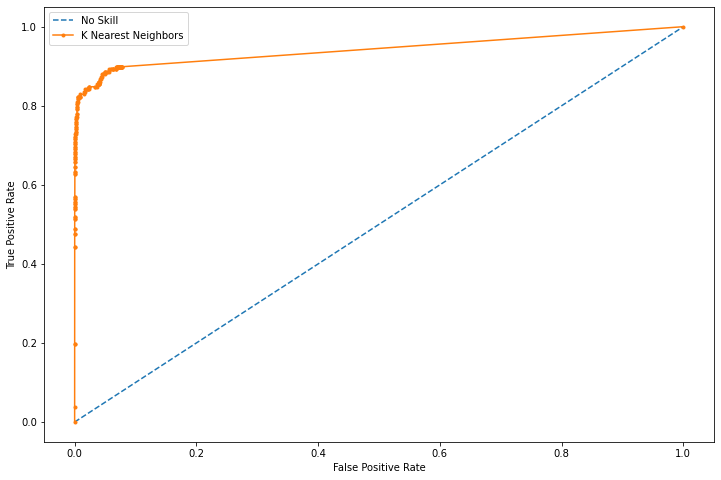

In [135]:
from matplotlib import pyplot
pyplot.figure(figsize=(12,8))
pyplot.plot(ns_fpr,ns_tpr, linestyle='--', label="No Skill")
pyplot.plot(knn_fpr,knn_tpr,marker=".", label="K Nearest Neighbors")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.show()

<h2> <center> Precision Recall Curve </center> </h2>

In [136]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [137]:
nbc_precision, nbc_recall , _ = precision_recall_curve(y_test,noskill_prob)

In [139]:
knn_precision, knn_recall, _ = precision_recall_curve(y_test,prob_estimates)

In [143]:
knn_f1_score = f1_score(y_test,predictions)

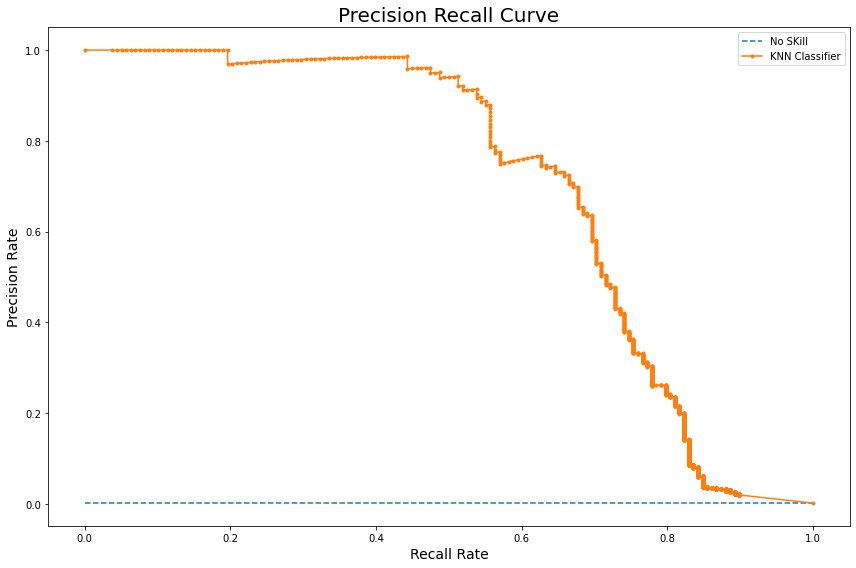

In [177]:
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[no_skill,no_skill], linestyle='--', label='No SKill')
pyplot.plot(knn_recall,knn_precision, marker='.', label = 'KNN Classifier')
pyplot.xlabel('Recall Rate', size=14)
pyplot.ylabel('Precision Rate', size=14)
pyplot.title('Precision Recall Curve', size=20)
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

<h2> <center> Calibration Curve </center> </h2>

<h4> Comparison of the confidence of model with the actual results. Suppose if model is
    70 % confident in predicting something, what is the percentage it is actuallt "right" </h4>

In [153]:
from sklearn.calibration import calibration_curve

In [155]:
prob_true, prob_predicted = calibration_curve(y_test,prob_estimates, n_bins=10, normalize=True)

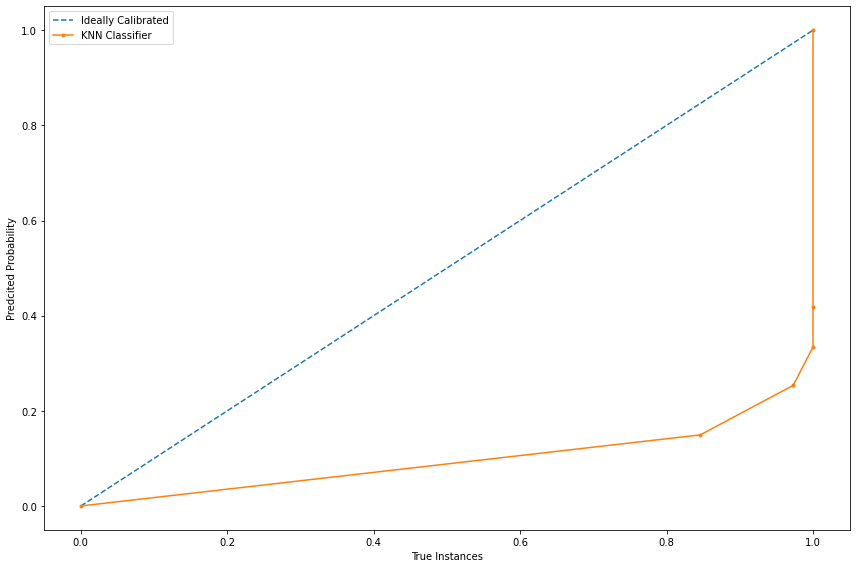

In [173]:
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[0,1], linestyle='--', label='Ideally Calibrated')
pyplot.plot(prob_true,prob_predicted, marker='.', label='KNN Classifier')
pyplot.xlabel('True Instances')
pyplot.ylabel('Predcited Probability')
pyplot.tight_layout()
pyplot.legend()
pyplot.show()

In [178]:
# Based on the above plot , our KNN classifier is not really good
# However our model did a good job on the Precision Recall Curve

<h2> <center> Learning Curve </center> </h2>

<h4><b>Bias</b></h4>
    
<h5>Difference between average prediction of model and the correct value. High bias means the model is very simplified and have not learned a lot about the signal from the data. Reason for "Underfitting"</h5>

<h4><b>Variance</b></h4>
    
<h5>This happens when the model learned a lot from the training data and does not generalize well to unseen data. Mostly causes "Overfitting"</h5>

In [179]:
from sklearn.model_selection import learning_curve

In [ ]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(),
                                                    X_train,
                                                    y_train,
                                                    cv=10,
                                                    scoring='recall',
                                                    n_jobs=-1,
                                                    train_sizes=np.linspace(0.01,1.0,50))

In [ ]:
train_means = np.mean(train_score,axis=1)
test_means = np.mean(test_scores,axis=1)

In [ ]:
pyplot.figure(figsize=(12,8))
pyplot.plot(train_size,train_means,'--', color="g",  label="Training Scores")
pyplot.plot(train_size,test_means,color="b", label="Test Scores")
pyplot.xlabel("Train Size")
pyplot.ylabel("Recall Performance")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()